# Project: Investigate TMDB Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this notebook, I will try exploring the most common and outlined Data investigating tools in popular TMBD movies dataset, featuring three outcomes that are:
> - Top 20 movies with longest runtime?
> - Most frequent genres over the years?
> - Most Frequent Actor?


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we investigate the quality of the dataset to be sure it's ready for clear data analyizing insights

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
sum(df.duplicated())

1

## TMDB movies Data Cleaning 

- drop unused columns
- cleaning missing values
- droping duplicated items
- changing  the format of  the release date into datetime one

In [8]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'revenue', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [9]:
df.head()

,popularity,budget,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


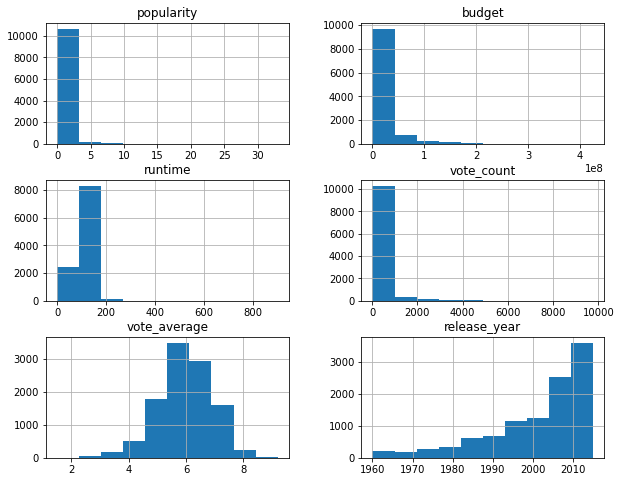

In [10]:
df.hist(figsize=(10, 8));

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   keywords              9373 non-null   object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB


In [13]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8667 non-null   float64
 1   budget                8667 non-null   int64  
 2   original_title        8667 non-null   object 
 3   cast                  8667 non-null   object 
 4   director              8667 non-null   object 
 5   keywords              8667 non-null   object 
 6   runtime               8667 non-null   int64  
 7   genres                8667 non-null   object 
 8   production_companies  8667 non-null   object 
 9   release_date          8667 non-null   object 
 10  vote_count            8667 non-null   int64  
 11  vote_average          8667 non-null   float64
 12  release_year          8667 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 948.0+ KB


In [14]:
df.drop_duplicates(inplace = True)

In [15]:
sum(df.duplicated())

0

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Detacting top 20 movies with longest runtime?

In [17]:
info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

In [18]:
x = list(data[:20])
y = list(info['runtime'][:20])

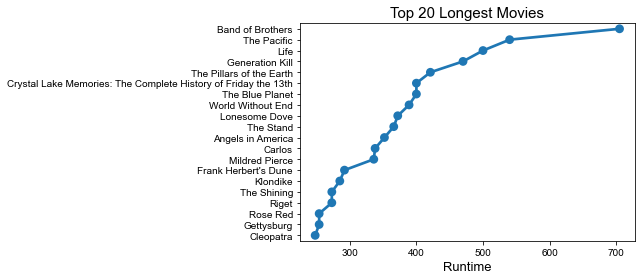

In [19]:
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title("Top 20 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("dark")

> there's a gap between band of brother and the rest of the movies

###  Research Question 2:   Detacting most frequent genres over the years?

In [20]:
n = 10
df['genres'].value_counts()[:n].index.tolist()

['Drama',
 'Comedy',
 'Drama|Romance',
 'Comedy|Drama',
 'Comedy|Romance',
 'Horror|Thriller',
 'Horror',
 'Comedy|Drama|Romance',
 'Documentary',
 'Drama|Thriller']

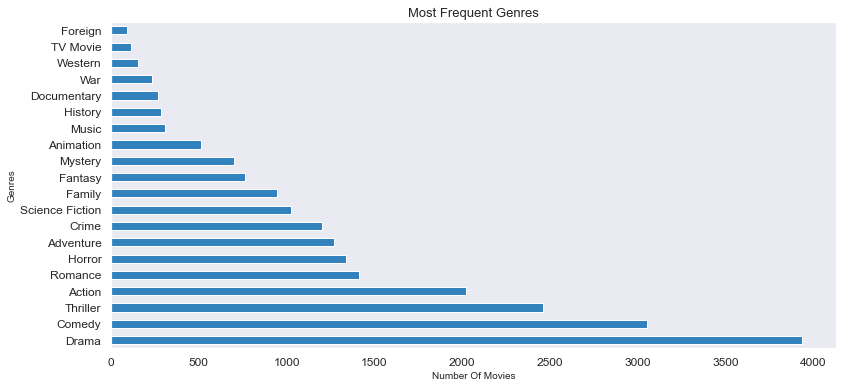

In [21]:
def count_genre(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info
total_genre_movies = count_genre('genres')
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')
plt.title("Most Frequent Genres",fontsize=13)
plt.xlabel('Number Of Movies',fontsize=10)
plt.ylabel("Genres",fontsize= 10)
sns.set_style("white")

In [22]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1

In [23]:
genre_details = list(map(str,(df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

In [24]:
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

In [25]:
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

In [26]:
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [27]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.787406,1.412525,2.141955,1.401893,0.551670,1.165511,1.010683,1.910834,1.542191,1.185769,...,0.630692,0.531893,0.715091,1.069583,1.181868,0.715645,0.846853,0.861791,1.276039,1.703254
Science Fiction,-0.447325,-0.556638,-0.636604,-0.644910,-0.666672,-0.876989,0.131481,-0.662380,1.459949,-0.681990,...,-0.284121,-0.377038,0.115034,0.772182,-0.082211,0.331251,0.226036,0.692389,0.953083,1.289502
Fantasy,-0.509629,-0.820387,-0.691328,-0.894400,-0.036621,-1.000553,-0.571201,-0.675757,-0.051966,-0.745323,...,0.075525,0.383375,-0.050630,0.161557,0.148692,0.040909,0.137821,-0.122478,-0.073655,-0.301214
Crime,-0.589720,-0.074778,-0.164532,-0.018738,0.084081,-0.519955,-0.003601,0.412203,0.213106,0.664515,...,0.127402,0.311832,0.271374,-0.382914,-0.163605,0.008252,0.123296,0.334549,-0.247828,0.034366
Western,0.739240,-0.563588,-0.242870,-0.862068,-1.008551,-0.524436,0.002440,-0.747084,-0.823969,1.081536,...,-1.027261,-1.004640,-1.072942,-1.098896,-0.941809,-0.942769,-0.847386,-0.965210,-0.928602,-0.742206


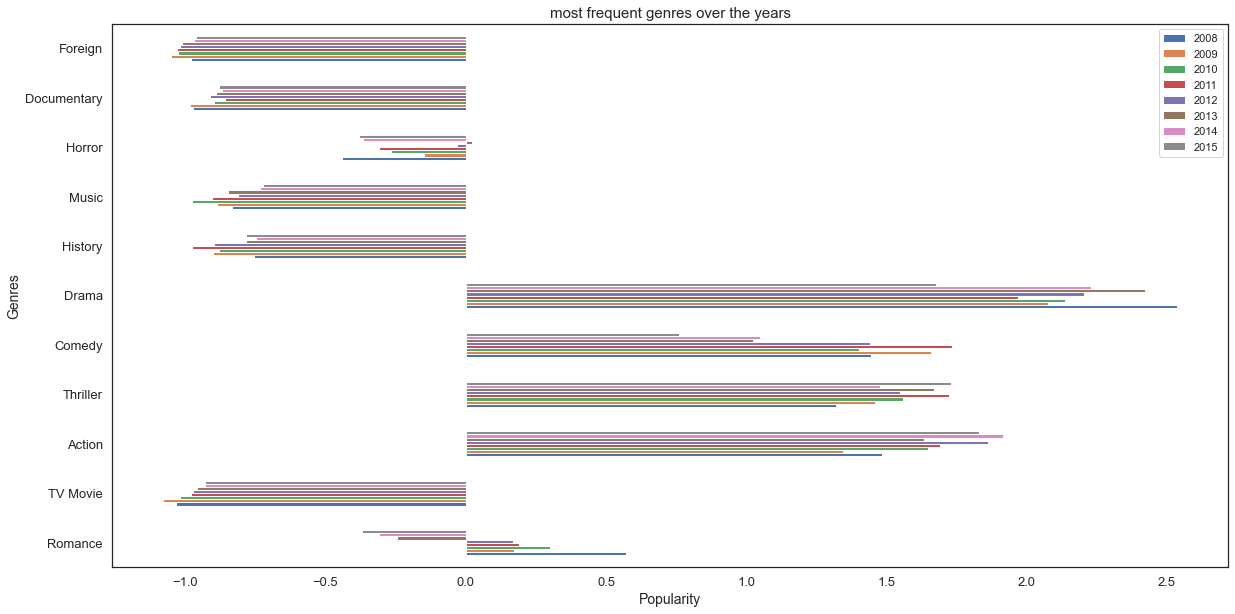

In [28]:
popular_genre.iloc[10:,48:].plot(kind='barh',figsize = (20,10),fontsize=13)
plt.title("most frequent genres over the years",fontsize=15)
plt.xlabel("Popularity",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

# Research Question 2: Most Frequent Actor?

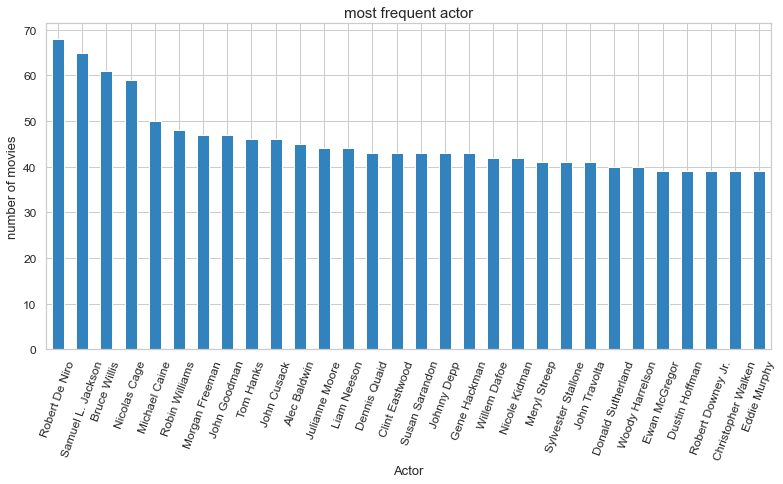

In [29]:
count_actor_films = count_genre('cast')
count_actor_films.iloc[:30].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)
plt.title("most frequent actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("number of movies",fontsize= 13)
sns.set_style("whitegrid")

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255